In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *

In [0]:
path = Path('drive/My Drive/Colab Notebooks/realimages')


In [4]:
path.ls()

[PosixPath('drive/My Drive/Colab Notebooks/realimages/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/deskchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/directorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/ladderbackchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/stools'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/widsorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/models'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/export.pkl')]

Create Directory


In [0]:
folder = 'deskchairs'
file = 'deskchairs.txt'

In [0]:
folder = 'directorchairs'
file = 'directorchair.txt'

In [0]:
folder = 'ladderbackchairs'
file = 'ladderbackchairs.txt'

In [0]:
folder = 'stools'
file = 'stools.txt'

In [0]:
folder = 'widsorchairs'
file = 'widsorchairs.txt'

In [0]:

dest = path/folder
dest.mkdir(parents = True , exist_ok = True)

Download Images

In [6]:
path.ls()

[PosixPath('drive/My Drive/Colab Notebooks/realimages/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/deskchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/directorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/ladderbackchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/stools'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/widsorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/models'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/export.pkl')]

In [0]:
classes = ['deskchairs','directorchairs','ladderbackchairs','stools','widsorchairs']

In [0]:
download_images(dest/file, dest, max_pics = 200)

In [8]:
for c in classes:
  print(len((path/c).ls()))
  verify_images(path/c,  max_size=400)

140


144


153


141


156


View Data

In [0]:
path.ls()

[PosixPath('drive/My Drive/Colab Notebooks/realimages/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/deskchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/directorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/ladderbackchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/stools'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/widsorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/models')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['deskchairs', 'directorchairs', 'ladderbackchairs', 'stools', 'widsorchairs']

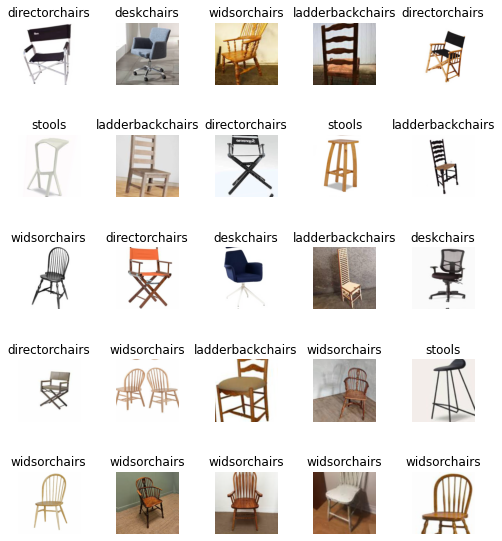

In [11]:
data.show_batch(rows=5, figsize=(7,8))

Train model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.941129,0.278463,0.075862,00:07
1,1.104211,0.216713,0.062069,00:07
2,0.755319,0.155230,0.048276,00:06
3,0.571712,0.149000,0.055172,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


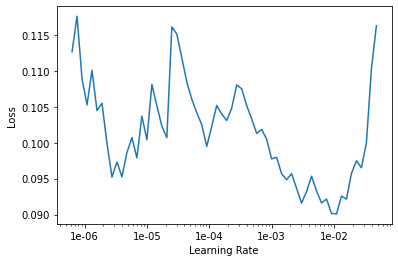

In [0]:
learn.recorder.plot()

In [0]:
learn.data.valid_ds

LabelList (145 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
stools,directorchairs,ladderbackchairs,ladderbackchairs,stools
Path: drive/My Drive/Colab Notebooks/realimages

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.095860,0.077353,0.020690,00:07
1,0.082581,0.077050,0.020690,00:07
2,0.079976,0.069927,0.020690,00:07


In [0]:
learn.save('stage-3')

Interpretation

In [0]:
learn.load('stage-3');

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

Putting your Model in Production

In [0]:
path.ls()

[PosixPath('drive/My Drive/Colab Notebooks/realimages/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/deskchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/directorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/ladderbackchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/stools'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/widsorchairs'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/models'),
 PosixPath('drive/My Drive/Colab Notebooks/realimages/export.pkl')]

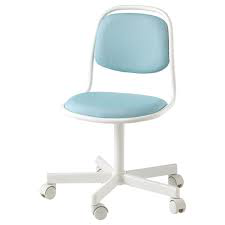

In [0]:
path2 = Path('drive/My Drive/Colab Notebooks/realimages/deskchairs/00000008.jpg')
img = open_image(path2)
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category deskchairs

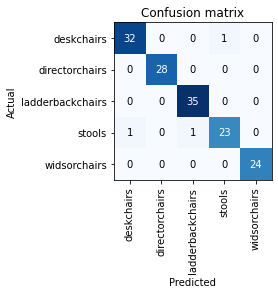

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

Cleaning up

In [0]:
from fastai.widgets import *

In [0]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
fd = FileDeleter(file_paths = top_loss_paths)

NameError: ignored

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
top_losses.ImageCleaner(ds, idxs)

NameError: ignored

In [0]:
!wget https://drive.google.com/file/d/1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo/view?usp=sharing


--2020-03-12 08:25:22--  https://drive.google.com/file/d/1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.24.100, 74.125.24.113, 74.125.24.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.24.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  67.03K  --.-KB/s    in 0.05s   

2020-03-12 08:25:23 (1.21 MB/s) - ‘view?usp=sharing’ saved [68642]



In [0]:
!wget 


--2020-03-12 08:43:32--  http://realimages/
Resolving realimages (realimages)... failed: Name or service not known.
wget: unable to resolve host address ‘realimages’


In [0]:
!unzip open?id=1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo


Archive:  open?id=1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of open?id=1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo or
        open?id=1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo.zip, and cannot find open?id=1w-RPrH-qbLHl0UOMMIfBMKsvUWcV5zOo.ZIP, period.

No zipfiles found.
